In [1]:
setwd('/data/import/project1//momo-6.12.0.199/runtime/PIPELINE/taxonkit1//a.ji/data2/')

In [2]:
library(openxlsx)
data<- read.xlsx("./res/CI-CTR/bulk/74-mRNA_FPKM.genename.xlsx", sheet = 1)
library(dplyr)
overlap = read.table('./overlap.txt',header =T)
data = data[!duplicated(data$Gene_name),]
head(data,2)
expr = data %>%  tibble::remove_rownames() %>% filter(Gene_name %in% overlap$GeneName) %>%  
tibble::column_to_rownames(.,'Gene_name') %>% t() %>% as.data.frame()
Group = c(rep('con',31),rep('CI',43))

colnames(expr) = gsub('-','.',colnames(expr))
colnames(expr)
Type = ifelse(Group == 'CI',1,0)
nn = cbind(Type,expr)

Warning message:
"package 'openxlsx' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




,Gene_name,C10,C11,C12,C13,C14,C15,C16,C17,C18,...,CI41,CI42,CI43,CI44,CI4,CI5,CI6,CI7,CI8,CI9
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ZZZ3,9.694104,8.204165,9.569441,6.659882,5.449594,8.611691,6.886018,5.389103,5.336686,...,14.880933,8.037799,5.667441,11.80003,6.659176,5.785232,8.749977,11.03076,8.004704,10.07247
2,ZZEF1,18.515927,18.296195,19.053030,18.403302,19.992571,18.649972,19.680564,20.438019,19.539639,...,8.751292,17.115120,16.585566,16.60637,18.344102,21.665904,21.333761,20.21582,17.918223,13.92859


[1] "ZNF480"   "ZNF354A"  "ZNF208"   "ZBED5"    "XRCC4"    "VCL"     
 [7] "TXN"      "TLN1"     "TFEC"     "TAF7"     "SYCP2"    "SUMO4"   
[13] "STON2"    "SPON2"    "SPOCD1"   "SH3TC2"   "SH2D2A"   "SCN9A"   
[19] "SAMD9"    "RPL34"    "RASD2"    "PTPRS"    "PRF1"     "POLR2K"  
[25] "PITPNM2"  "PILRB"    "PER1"     "PDGFA"    "PCDH1"    "OSBPL7"  
[31] "OSBPL5"   "NID1"     "NCR3"     "MLC1"     "MAP1A"    "LSM3"    
[37] "LPAR6"    "LMNA"     "KIR2DL1"  "KIFC3"    "IL2RB"    "IGJ"     
[43] "HCFC1"    "GPR56"    "GNLY"     "GAPT"     "FSD1"     "FOSB"    
[49] "FLNA"     "FAM200B"  "F2R"      "EVI2A"    "ERBB2"    "DUSP2"   
[55] "DDIT4"    "DAB2"     "CSTA"     "CLSTN1"   "CLEC2B"   "CARNS1"  
[61] "CACNA2D2" "BZRAP1"   "BMP6"     "BCL2A1"   "BAI2"     "ATP1A3"  
[67] "ATG2A"    "ARVCF"    "ARHGAP6"

In [3]:
x = as.matrix(expr)
y = Type

In [4]:
save(x,y,file = 'for.lunwen.rda')

In [5]:
library(randomForest)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine




In [6]:
options(repr.plot.width = 6)

In [7]:
set.seed(101)

In [8]:
dim(expr)

[1] 74 69

In [9]:
rf = randomForest(as.factor(y)~.,data = x,ntree =2000,important=TRUE,proximity=TRUE)

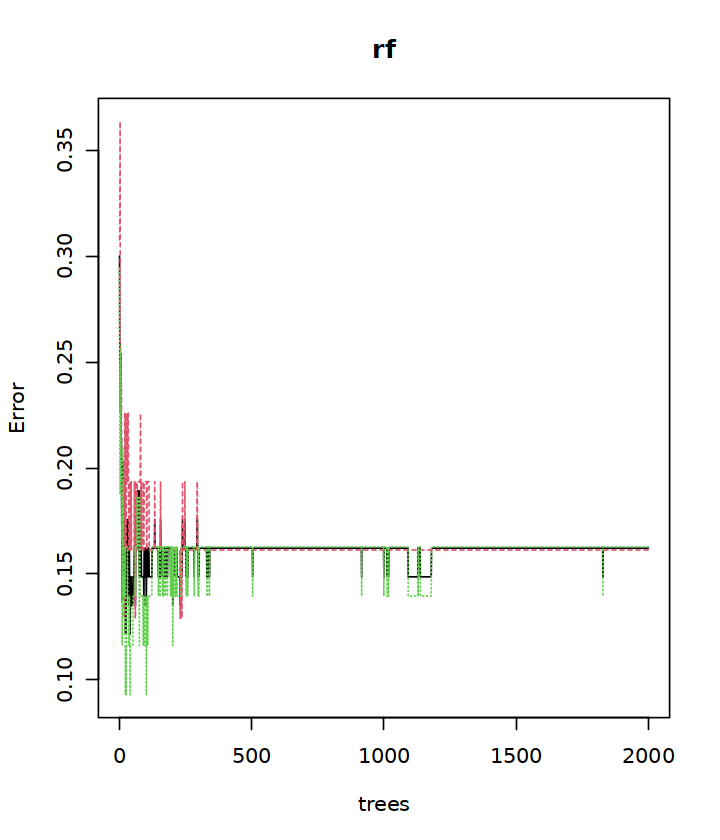

In [10]:
plot(rf)

In [11]:
pdf('./fig2/figure2.forest.pdf',height = 6,width = 6)
plot(rf)
dev.off()

png 
  2

In [12]:
trees = which.min(rf$err.rate[,1])

In [13]:
rf = randomForest(as.factor(y)~.,data = x,ntree =trees,important=TRUE,proximity=TRUE)

In [14]:
importance = importance(rf)

In [15]:
rf


Call:
 randomForest(formula = as.factor(y) ~ ., data = x, ntree = trees,      important = TRUE, proximity = TRUE) 
               Type of random forest: classification
                     Number of trees: 23
No. of variables tried at each split: 8

        OOB estimate of  error rate: 24.32%
Confusion matrix:
   0  1 class.error
0 22  9   0.2903226
1  9 34   0.2093023

In [16]:
pdf('forest2.pdf',height = 6,width = 4)
varImpPlot(rf,main = '')
dev.off()

png 
  2

In [17]:
options(repr.plot.width = 4,repr.plot.height = 7)

In [18]:
pdf('./fig2/figure2.forest2.pdf',height = 7,width = 5)
varImpPlot(rf,main = '')
dev.off()

png 
  2

In [19]:
rfGenes=importance[order(importance[, "MeanDecreaseGini"], decreasing  = TRUE),] #重要性评分大于2的基因

In [20]:
names(rfGenes)

[1] "FLNA"     "OSBPL7"   "PRF1"     "FAM200B"  "PILRB"    "SAMD9"   
 [7] "SH3TC2"   "ATG2A"    "PITPNM2"  "F2R"      "BCL2A1"   "VCL"     
[13] "IGJ"      "STON2"    "TAF7"     "CLSTN1"   "DAB2"     "ARVCF"   
[19] "PDGFA"    "HCFC1"    "TXN"      "ARHGAP6"  "CLEC2B"   "NCR3"    
[25] "LMNA"     "ZNF354A"  "KIR2DL1"  "MAP1A"    "LPAR6"    "ZNF208"  
[31] "ZNF480"   "DUSP2"    "BZRAP1"   "PCDH1"    "SYCP2"    "GNLY"    
[37] "ATP1A3"   "CSTA"     "KIFC3"    "PTPRS"    "POLR2K"   "ERBB2"   
[43] "BMP6"     "TFEC"     "SCN9A"    "DDIT4"    "SUMO4"    "XRCC4"   
[49] "SPOCD1"   "CACNA2D2" "IL2RB"    "ZBED5"    "TLN1"     "SPON2"   
[55] "SH2D2A"   "RPL34"    "RASD2"    "PER1"     "OSBPL5"   "NID1"    
[61] "MLC1"     "LSM3"     "GPR56"    "GAPT"     "FSD1"     "FOSB"    
[67] "EVI2A"    "CARNS1"   "BAI2"

### Boruta

In [21]:
library(Boruta)

In [22]:
set.seed(1)
boruta <- Boruta(x=x, y=y, pValue=0.05, mcAdj=T, 
       maxRuns=300)

In [23]:
boruta

Boruta performed 299 iterations in 14.04863 secs.
 30 attributes confirmed important: ARHGAP6, ARVCF, ATG2A, BZRAP1,
CLSTN1 and 25 more;
 33 attributes confirmed unimportant: ATP1A3, BAI2, BCL2A1, BMP6,
CACNA2D2 and 28 more;
 6 tentative attributes left: IGJ, MLC1, SH2D2A, ZNF208, ZNF354A and 1
more;

In [24]:
table(boruta$finalDecision)


Tentative Confirmed  Rejected 
        6        30        33 

In [25]:
boruta$finalDecision

ZNF480   ZNF354A    ZNF208     ZBED5     XRCC4       VCL       TXN      TLN1 
Tentative Tentative Tentative  Rejected  Rejected Confirmed Confirmed Confirmed 
     TFEC      TAF7     SYCP2     SUMO4     STON2     SPON2    SPOCD1    SH3TC2 
 Rejected  Rejected  Rejected Confirmed Confirmed  Rejected  Rejected Confirmed 
   SH2D2A     SCN9A     SAMD9     RPL34     RASD2     PTPRS      PRF1    POLR2K 
Tentative Confirmed Confirmed  Rejected  Rejected Confirmed Confirmed  Rejected 
  PITPNM2     PILRB      PER1     PDGFA     PCDH1    OSBPL7    OSBPL5      NID1 
Confirmed Confirmed Confirmed Confirmed  Rejected Confirmed  Rejected  Rejected 
     NCR3      MLC1     MAP1A      LSM3     LPAR6      LMNA   KIR2DL1     KIFC3 
 Rejected Tentative Confirmed  Rejected  Rejected  Rejected Confirmed Confirmed 
    IL2RB       IGJ     HCFC1     GPR56      GNLY      GAPT      FSD1      FOSB 
 Rejected Tentative Confirmed Confirmed  Rejected  Rejected  Rejected  Rejected 
     FLNA   FAM200B       F2R     EVI2A     ERBB2     DUSP2     DDIT4      DAB2 
Confirmed Confirmed Confirmed Confirmed  Rejected  Rejected  Rejected Confirmed 
     CSTA    CLSTN1    CLEC2B    CARNS1  CACNA2D2    BZRAP1      BMP6    BCL2A1 
 Rejected Confirmed  Rejected  Rejected  Rejected Confirmed  Rejected  Rejected 
     BAI2    ATP1A3     ATG2A     ARVCF   ARHGAP6 
 Rejected  Rejected Confirmed Confirmed Confirmed 
Levels: Tentative Confirmed Rejected

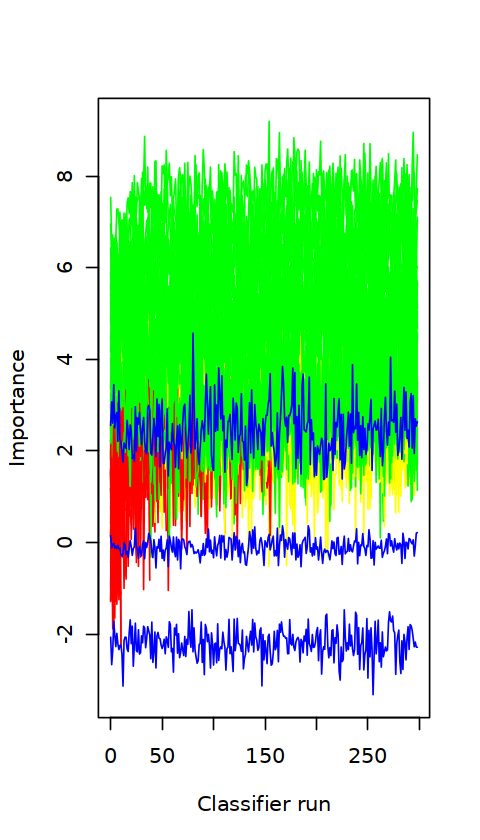

In [26]:
Boruta::plotImpHistory(boruta)

In [27]:
library(dplyr)
boruta.imp <- function(x){
  imp <- reshape2::melt(x$ImpHistory, na.rm=T)[,-1]
  colnames(imp) <- c("Variable","Importance")
  imp <- imp[is.finite(imp$Importance),]

  variableGrp <- data.frame(Variable=names(x$finalDecision), 
                            finalDecision=x$finalDecision)

  showGrp <- data.frame(Variable=c("shadowMax", "shadowMean", "shadowMin"),
                        finalDecision=c("shadowMax", "shadowMean", "shadowMin"))

  variableGrp <- rbind(variableGrp, showGrp)

  boruta.variable.imp <- merge(imp, variableGrp, all.x=T)

  sortedVariable <- boruta.variable.imp %>% group_by(Variable) %>% 
    summarise(median=median(Importance)) %>% arrange(median)
  sortedVariable <- as.vector(sortedVariable$Variable)


  boruta.variable.imp$Variable <- factor(boruta.variable.imp$Variable, levels=sortedVariable)

  invisible(boruta.variable.imp)
}
boruta.variable.imp <- boruta.imp(boruta)


Welcome to YSX package which is a collection of useful scripts.
This package does not require you install all depended packages, since one may not need all functions in this package.
However, when there is a message implying some functions are missing,please install these packages manually.
Or more specially, check Plot.Rmd in vignettes first.




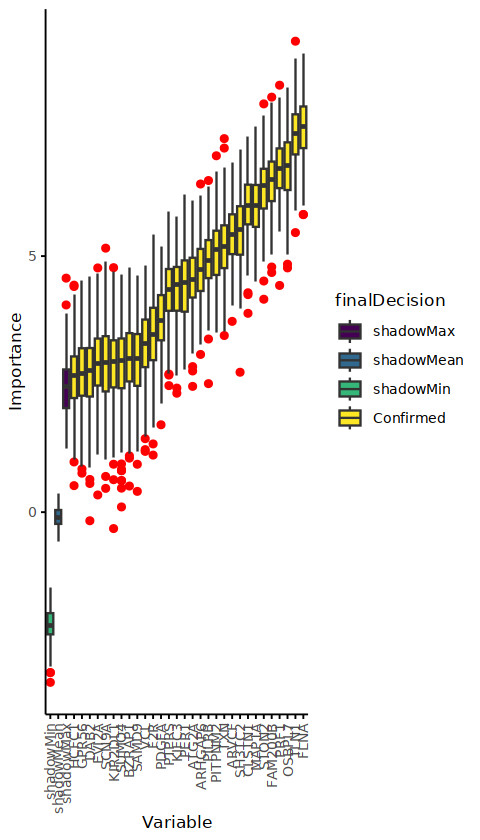

In [28]:
library(YSX)

sp_boxplot(boruta.variable.imp, melted=T, xvariable = "Variable", yvariable = "Importance",
           legend_variable = "finalDecision", legend_variable_order = c("shadowMax", "shadowMean", "shadowMin", "Confirmed"),
           xtics_angle = 90)

In [29]:
expr3 = cbind(Group,expr)

In [30]:
boruta.variable.imp2 = boruta.variable.imp %>% dplyr::filter(finalDecision %in% c('Confirmed')) %>% dplyr::select(Variable) %>% unique()
Boruta.gene = as.vector(boruta.variable.imp2$Variable)

In [31]:
model.gene = Boruta.gene

In [32]:
model.gene

[1] "ARHGAP6" "ARVCF"   "ATG2A"   "BZRAP1"  "CLSTN1"  "DAB2"    "EVI2A"  
 [8] "F2R"     "FAM200B" "FLNA"    "GPR56"   "HCFC1"   "KIFC3"   "KIR2DL1"
[15] "MAP1A"   "OSBPL7"  "PDGFA"   "PER1"    "PILRB"   "PITPNM2" "PRF1"   
[22] "PTPRS"   "SAMD9"   "SCN9A"   "SH3TC2"  "STON2"   "SUMO4"   "TLN1"   
[29] "TXN"     "VCL"

In [33]:
a  = names(rfGenes)[1:25]

In [34]:
model.gene =a

In [35]:
model.gene

[1] "FLNA"    "OSBPL7"  "PRF1"    "FAM200B" "PILRB"   "SAMD9"   "SH3TC2" 
 [8] "ATG2A"   "PITPNM2" "F2R"     "BCL2A1"  "VCL"     "IGJ"     "STON2"  
[15] "TAF7"    "CLSTN1"  "DAB2"    "ARVCF"   "PDGFA"   "HCFC1"   "TXN"    
[22] "ARHGAP6" "CLEC2B"  "NCR3"    "LMNA"

In [36]:
set.seed(1234)

In [37]:
expr = as.data.frame(apply(expr,2,as.numeric))

In [38]:
expr3 = as.data.frame(cbind(Group,expr))

In [39]:
expr3$Group = ifelse(expr3$Group == 'CI',1,0)

In [40]:
expr3$Group = as.factor(expr3$Group)

In [41]:
expr4 = expr3 %>% dplyr::select(c(Group,model.gene))

Warning message:
"Using an external vector in selections was deprecated in tidyselect 1.1.0.
i Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(model.gene)

  # Now:
  data %>% select(all_of(model.gene))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>."


In [42]:
dim(expr4)

[1] 74 26

In [43]:
head(expr4,4)

,Group,FLNA,OSBPL7,PRF1,FAM200B,PILRB,SAMD9,SH3TC2,ATG2A,PITPNM2,...,CLSTN1,DAB2,ARVCF,PDGFA,HCFC1,TXN,ARHGAP6,CLEC2B,NCR3,LMNA
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,173.9405,5.085089,126.5548,4.886505,1.712318,32.51025,0.2337882,13.04633,5.723598,...,16.82540,4.164622,0.8559196,1.632609,16.06443,7.655688,1.176161,15.45308,9.646492,2.421837
2,0,173.4102,4.899562,129.5850,6.201921,1.056324,50.12144,0.1746903,15.02437,4.599906,...,13.40344,4.082477,0.8992942,1.546559,11.72785,17.794071,1.233943,28.83879,8.216351,1.924999
3,0,178.6210,5.459095,142.2673,5.778473,1.858418,48.90929,0.2176311,17.88716,5.601272,...,16.65883,4.669645,1.1737319,1.392164,15.44092,13.325481,1.089114,24.91838,12.833994,2.323408
4,0,234.2787,3.826873,209.4598,5.170836,1.093949,36.25937,0.2769637,16.37020,5.435442,...,15.26384,3.392254,0.8793481,2.218069,12.73905,15.403335,1.223507,26.34199,11.395057,3.267599


In [44]:
library(caret)
library(ggplot2)

Warning message:
"package 'caret' was built under R version 4.2.3"
Loading required package: ggplot2


Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin


Loading required package: lattice

Warning message:
"package 'lattice' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"


In [46]:
library(caret)
library(ggplot2)

table = c()
# 
for (i in model.gene){
    res<-pROC::roc(Group~expr4[,i],data=expr4,aur=TRUE,
         ci=TRUE,
         smooth=FALSE,
         levels=c(0,1),direction="<" 
         )
        table = append(table,res$auc)

    }

In [47]:
auc = data.frame(gene = model.gene,auc = table)

In [48]:
write.csv(auc,file = './fig2/select.auc.csv')

In [49]:
library(caret)
library(ggplot2)

 a = c()
# 
for (i in model.gene){
    res<-pROC::roc(Group~expr4[,i],data=expr4,aur=TRUE,
         ci=TRUE, 
         
         smooth=FALSE,
         levels=c(0,1),direction="<" 
         )
    if (res$auc > 0.7){
        a = append(a,i)
        print(paste0(i,' ',res$auc))
        p = pROC::ggroc(res, color ="red",legacy.axes = TRUE)+
  geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color="darkgrey", linetype=4)+
  theme_bw() + #
  ggtitle(paste0(i," ROC Curve"))+
  theme(plot.title = element_text(hjust = 0.5,size = 16),
        axis.text=element_text(size=12,colour = "black"),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14))
p+annotate("text",x=0.75,y=0.25,label=paste("AUC = ", round(res$auc,3)))+
  annotate("text",x=0.75,y=0.20,label=paste("95%CI: ", round(res$ci[1],3),'-',round(res$ci[3],3)))
    ggsave(file = paste0('./fig/',i,'.ROC.pdf'))
}else{
        
}

    
    }

[1] "FAM200B 0.900975243810953"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 75 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "SAMD9 0.797449362340585"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 75 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "BCL2A1 0.731432858214554"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 75 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "IGJ 0.718679669917479"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 75 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "TAF7 0.800450112528132"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 75 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "TXN 0.833458364591148"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 75 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "CLEC2B 0.780945236309077"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 75 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


In [50]:
library(pROC)

Warning message:
"package 'pROC' was built under R version 4.2.3"
Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




In [51]:
packageVersion('pROC')

[1] '1.18.4'

In [52]:
expr4 = expr4[,c('Group',a)]

In [53]:
library(plyr)
library(rms)
library(epiDisplay)

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: 'plyr'


The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Warning message:
"package 'rms' was built under R version 4.2.3"
Loading required package: Hmisc


Attaching package: 'Hmisc'


The following objects are masked from 'package:plyr':

    is.discrete, summarize


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    format.pval, units


Loading required package: foreign

Warning message:
"package 'foreign' was built under R version 4.2.3"
Loading require

In [54]:
varsU<-names(expr4[,2:dim(expr4)[2]])

In [55]:
Result<-c()
for (i in 1:length(varsU)){
  fit<-glm(substitute(Group~x,list(x=as.name(varsU[i]))),data=expr4,family=binomial())
  fitSum<-summary(fit)
  result1<-c()
  result1<-rbind(result1,fitSum$coef)
  OR<-exp(fitSum$coef[,'Estimate'])
  result1<-data.frame(cbind(result1,cbind(OR,exp(confint(fit)))))
  result1$Characteristics<-varsU[i]   
  Result<-rbind(Result,result1[-1,])
}

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...



In [56]:
Result

,Estimate,Std..Error,z.value,Pr...z..,OR,X2.5..,X97.5..,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
FAM200B,1.62868115,0.392785478,4.146490,3.376106e-05,5.097148,2.626555,12.577251,FAM200B
SAMD9,0.06235207,0.018098816,3.445091,5.708673e-04,1.064337,1.031340,1.107965,SAMD9
BCL2A1,0.04984612,0.016348041,3.049058,2.295604e-03,1.051109,1.021015,1.088910,BCL2A1
IGJ,0.02557740,0.009244842,2.766667,5.663249e-03,1.025907,1.009478,1.047112,IGJ
TAF7,0.21097212,0.055632134,3.792271,1.492760e-04,1.234878,1.120166,1.396531,TAF7
TXN,0.27518002,0.071620720,3.842184,1.219441e-04,1.316768,1.161755,1.541887,TXN
CLEC2B,0.14552677,0.040444621,3.598174,3.204597e-04,1.156649,1.077389,1.264078,CLEC2B


In [57]:
Uni_log<-data.frame(Result[,c(1,4:8)]) 
colnames(Uni_log)[2:5]<-c("P","OR","CIlower","CIupper")
ExtractVar<-unique(Uni_log$Characteristics[Uni_log$"P"<0.05]) 

In [58]:
tzgene = Uni_log %>% dplyr::filter(P < 0.05) %>% rownames()

In [59]:
Uni_log[tzgene,]

,Estimate,P,OR,CIlower,CIupper,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
FAM200B,1.62868115,3.376106e-05,5.097148,2.626555,12.577251,FAM200B
SAMD9,0.06235207,5.708673e-04,1.064337,1.031340,1.107965,SAMD9
BCL2A1,0.04984612,2.295604e-03,1.051109,1.021015,1.088910,BCL2A1
IGJ,0.02557740,5.663249e-03,1.025907,1.009478,1.047112,IGJ
TAF7,0.21097212,1.492760e-04,1.234878,1.120166,1.396531,TAF7
TXN,0.27518002,1.219441e-04,1.316768,1.161755,1.541887,TXN
CLEC2B,0.14552677,3.204597e-04,1.156649,1.077389,1.264078,CLEC2B


In [60]:
ss = Uni_log[tzgene,]

In [61]:
write.csv(ss,file = './fig2/select.uni.csv')

In [62]:
tzgene

[1] "FAM200B" "SAMD9"   "BCL2A1"  "IGJ"     "TAF7"    "TXN"     "CLEC2B"

In [63]:
data = expr4[,c('Group',tzgene)]
data$Group = factor(data$Group,levels = c(0,1))

In [64]:
fit.reduce<-glm(Group~.,data=data,family=binomial())
summary(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.60570  -0.36452   0.00619   0.35243   2.70795  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -14.775523   3.800537  -3.888 0.000101 ***
FAM200B       1.772176   0.603982   2.934 0.003345 ** 
SAMD9         0.040415   0.043092   0.938 0.348311    
BCL2A1       -0.053702   0.037880  -1.418 0.156283    
IGJ           0.027406   0.014756   1.857 0.063269 .  
TAF7         -0.006388   0.119356  -0.054 0.957318    
TXN           0.350635   0.156328   2.243 0.024901 *  
CLEC2B       -0.080369   0.098376  -0.817 0.413956    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 100.63  on 73  degrees of freedom
Residual deviance:  44.65  on 66  degrees of freedom
AIC: 60.65

Number of Fisher Scoring iterations: 7


In [65]:
logit.step <- step(fit.reduce,direction='both')
summary(logit.step)

Start:  AIC=60.65
Group ~ FAM200B + SAMD9 + BCL2A1 + IGJ + TAF7 + TXN + CLEC2B

          Df Deviance    AIC
- TAF7     1   44.652 58.652
- CLEC2B   1   45.349 59.349
- SAMD9    1   45.545 59.545
<none>         44.650 60.650
- BCL2A1   1   46.770 60.770
- IGJ      1   48.841 62.841
- TXN      1   51.514 65.514
- FAM200B  1   58.703 72.703

Step:  AIC=58.65
Group ~ FAM200B + SAMD9 + BCL2A1 + IGJ + TXN + CLEC2B

          Df Deviance    AIC
- CLEC2B   1   45.385 57.385
- SAMD9    1   45.763 57.763
<none>         44.652 58.652
- BCL2A1   1   47.174 59.174
+ TAF7     1   44.650 60.650
- IGJ      1   49.076 61.076
- TXN      1   51.990 63.990
- FAM200B  1   59.388 71.388

Step:  AIC=57.38
Group ~ FAM200B + SAMD9 + BCL2A1 + IGJ + TXN

          Df Deviance    AIC
- SAMD9    1   45.859 55.859
<none>         45.385 57.385
- BCL2A1   1   48.225 58.225
+ CLEC2B   1   44.652 58.652
+ TAF7     1   45.349 59.349
- IGJ      1   50.004 60.004
- TXN      1   52.358 62.358
- FAM200B  1   60.342 70.342



Call:
glm(formula = Group ~ FAM200B + BCL2A1 + IGJ + TXN, family = binomial(), 
    data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.55106  -0.40758   0.01191   0.36742   2.61590  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -13.81708    3.43399  -4.024 5.73e-05 ***
FAM200B       1.61195    0.48498   3.324 0.000888 ***
BCL2A1       -0.05003    0.03327  -1.504 0.132638    
IGJ           0.02869    0.01442   1.989 0.046654 *  
TXN           0.32451    0.14074   2.306 0.021124 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 100.631  on 73  degrees of freedom
Residual deviance:  45.859  on 69  degrees of freedom
AIC: 55.859

Number of Fisher Scoring iterations: 7


In [66]:

formatFit<-function(fit){
  p<-summary(fit)$coefficients[,4]
  wald<-summary(fit)$coefficients[,3]^2
  valueB<-coef(fit)
  valueOR<-exp(coef(fit))
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}
formatFit(logit.step)

Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


,B,Wald,OR_with_CI,P
,<dbl>,<dbl>,<chr>,<chr>
(Intercept),-13.817,16.190,0(0~0),<0.001
FAM200B,1.612,11.047,5.013(2.212~15.552),<0.001
BCL2A1,-0.050,2.261,0.951(0.886~1.013),0.133
IGJ,0.029,3.958,1.029(1.003~1.062),0.047
TXN,0.325,5.317,1.383(1.074~1.887),0.021


In [67]:
a

[1] "FAM200B" "SAMD9"   "BCL2A1"  "IGJ"     "TAF7"    "TXN"     "CLEC2B"

In [68]:
b = rownames(formatFit(logit.step))[2:length(rownames(formatFit(logit.step)))]

Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Waiting for profiling to be done...

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [69]:
data = data[,c('Group',b)]

In [70]:
set.seed(101)
folds <-createMultiFolds(y=data$Group,k=5,times=10)
auc_value<-as.numeric()
for(i in 1:10){ 
  train<- data[ folds[[i]],] 
  test <- data[-folds[[i]],] 
  model<-glm(Group~.,data=train ,family=binomial())
    
  model_pre<-predict(model,type='response', newdata=train)
  auc_value<- append(auc_value,
                     as.numeric(pROC::auc(as.numeric(train[,1]),model_pre)))
}
mean(auc_value)

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases

Setting levels: control = 1, case = 2

Setting direction: controls < cases



[1] 0.9428583

In [71]:
auc_value

[1] 0.9362745 0.9470588 0.9542857 0.9451429 0.9294118 0.9382857 0.9404762
 [8] 0.9541176 0.9564706 0.9270588

In [72]:
num <- which.max(auc_value)

In [73]:
train<- data[ folds[[num]],] 
test <- data[-folds[[num]],] 

In [74]:
library(rms)
dd <- datadist(train)
options(datadist="dd")
fit1 <- lrm(Group ~.,
            data = train,x=T,y=T)
cal1 <- calibrate(fit1, method='boot', B=100)


Divergence or singularity in 5 samples


In [75]:
options(repr.plot.width = 6)

In [76]:
pdf('./fig/QC1.pdf',width = 6,height = 6)
plot(cal1,
     xlim = c(0,1),
     xlab = "Predicted Probability",
     ylab = "Observed Probability",
     legend = FALSE,
     subtitles = FALSE)
abline(0,1,col = "black",lty = 2,lwd = 2)
lines(cal1[,c("predy","calibrated.orig")], type = "l",lwd = 2,col="red",pch =16)
lines(cal1[,c("predy","calibrated.corrected")], type = "l",lwd = 2,col="green",pch =16)
legend(0.55,0.35,
       c("Apparent","Ideal","Bias-corrected"),
       lty = c(2,1,1),
       lwd = c(2,1,1),
       col = c("black","red","green"),
       bty = "n") 
dev.off()


n=59   Mean absolute error=0.037   Mean squared error=0.00177
0.9 Quantile of absolute error=0.056



png 
  2


n=59   Mean absolute error=0.037   Mean squared error=0.00177
0.9 Quantile of absolute error=0.056



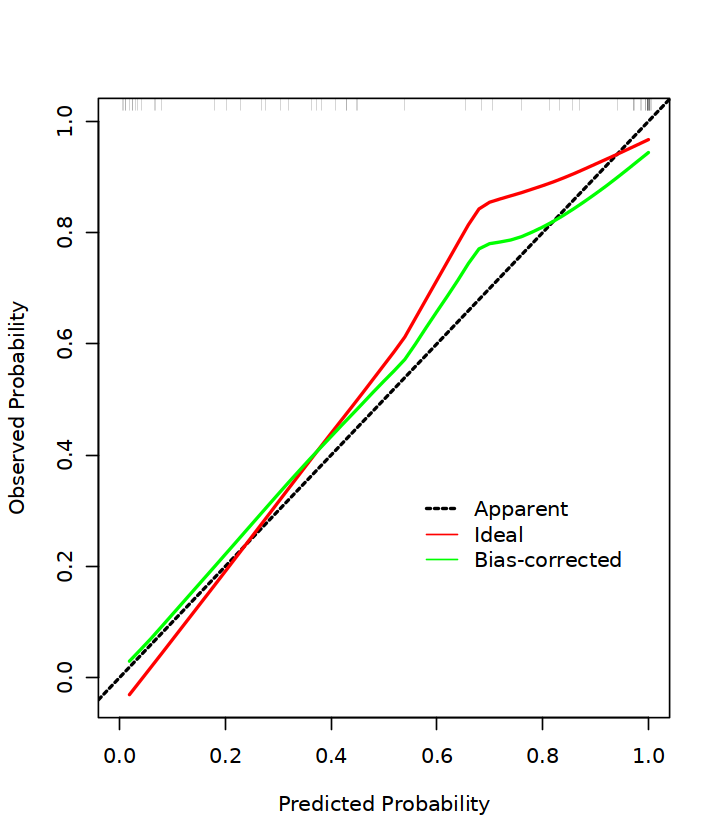

In [77]:
plot(cal1,
     xlim = c(0,1),
     xlab = "Predicted Probability",
     ylab = "Observed Probability",
     legend = FALSE,
     subtitles = FALSE)
abline(0,1,col = "black",lty = 2,lwd = 2)
lines(cal1[,c("predy","calibrated.orig")], type = "l",lwd = 2,col="red",pch =16)
lines(cal1[,c("predy","calibrated.corrected")], type = "l",lwd = 2,col="green",pch =16)
legend(0.55,0.35,
       c("Apparent","Ideal","Bias-corrected"),
       lty = c(2,1,1),
       lwd = c(2,1,1),
       col = c("black","red","green"),
       bty = "n") 

In [78]:
fold_pre <- glm(Group~.,data=train,family=binomial())
fold_predict <- predict(fold_pre,type='response',newdata=data)

In [79]:
options(repr.plot.height = 6,repr.plot.width = 6)

In [80]:
library(pROC)

In [81]:
res <- roc(data$Group,data$BCL2A1,ci=T,auc=T)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



In [82]:
pdf('./fig/ROC.pdf',height = 6,width = 6)
rocobj1 <- plot.roc(data$Group, data$BCL2A1,percent=TRUE, levels=c(0,1),direction="<",col="#1c61b6")
rocobj2 <- lines.roc(data$Group, data$FAM200B,percent=TRUE, levels=c(0,1),direction="<", col="#008600")
rocobj3 <- lines.roc(data$Group, data$IGJ,percent=TRUE, levels=c(0,1),direction="<", col="#9C6D35")
rocobj4 <- lines.roc(data$Group, data$TXN,percent=TRUE, levels=c(0,1),direction="<", col="#9F1A70")
rocobj5 <- lines.roc(data$Group, fold_predict,percent=TRUE, levels=c(0,1),direction="<", col="#491A9F")
legend("right", legend=c(paste0("BCL2A1 ", round(rocobj1$auc/100,digits = 2)),
                               paste0("FAM200B ", round(rocobj2$auc/100,digits = 2)),
                               paste0("IGJ ", round(rocobj3$auc/100,digits = 2)),
                               paste0("TXN ", round(rocobj4$auc/100,digits = 2)),
                               paste0("fold_predict ", round(rocobj5$auc/100,digits = 2))),
       col=c("#1c61b6", "#008600","#9C6D35","#9F1A70","#491A9F"), lwd=1)
dev.off()

png 
  2

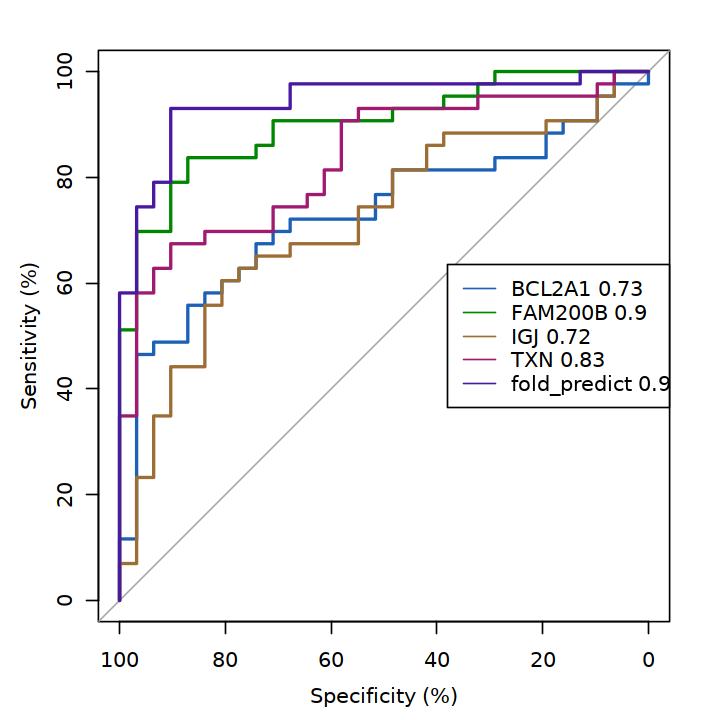

In [83]:
rocobj1 <- plot.roc(data$Group, data$BCL2A1,percent=TRUE, levels=c(0,1),direction="<",col="#1c61b6")
rocobj2 <- lines.roc(data$Group, data$FAM200B,percent=TRUE, levels=c(0,1),direction="<", col="#008600")
rocobj3 <- lines.roc(data$Group, data$IGJ,percent=TRUE, levels=c(0,1),direction="<", col="#9C6D35")
rocobj4 <- lines.roc(data$Group, data$TXN,percent=TRUE, levels=c(0,1),direction="<", col="#9F1A70")
rocobj5 <- lines.roc(data$Group, fold_predict,percent=TRUE, levels=c(0,1),direction="<", col="#491A9F")
legend("right", legend=c(paste0("BCL2A1 ", round(rocobj1$auc/100,digits = 2)),
                               paste0("FAM200B ", round(rocobj2$auc/100,digits = 2)),
                               paste0("IGJ ", round(rocobj3$auc/100,digits = 2)),
                               paste0("TXN ", round(rocobj4$auc/100,digits = 2)),
                               paste0("fold_predict ", round(rocobj5$auc/100,digits = 2))),
       col=c("#1c61b6", "#008600","#9C6D35","#9F1A70","#491A9F"), lwd=1)

In [85]:
library("autoReg")
overall.log =  glm(Group~.,data=data,family=binomial())
model3<-autoReg(overall.log,uni=TRUE,milti=TRUE,threshold=0.05)
model3


Attaching package: 'autoReg'


The following object is masked from 'package:MASS':

    select




name,desc,0 (N=31),1 (N=43),id,OR (univariable),OR (multivariable)
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
FAM200B,Mean <U+00B1> SD,5.0 <U+00B1> 0.9,7.2 <U+00B1> 1.7,FAM200B,"5.10 (2.36-11.01, p<.001)","5.01 (1.94-12.97, p<.001)"
BCL2A1,Mean <U+00B1> SD,29.7 <U+00B1> 13.3,50.5 <U+00B1> 34.8,BCL2A1,"1.05 (1.02-1.09, p=.002)","0.95 (0.89-1.02, p=.133)"
IGJ,Mean <U+00B1> SD,34.0 <U+00B1> 25.1,63.3 <U+00B1> 47.5,IGJ,"1.03 (1.01-1.04, p=.006)","1.03 (1.00-1.06, p=.047)"
TXN,Mean <U+00B1> SD,14.2 <U+00B1> 3.6,22.1 <U+00B1> 9.0,TXN,"1.32 (1.14-1.52, p<.001)","1.38 (1.05-1.82, p=.021)"


In [86]:
write.csv(model3,file = './fig/model3.csv')

In [87]:
options(repr.plot.width = 8)

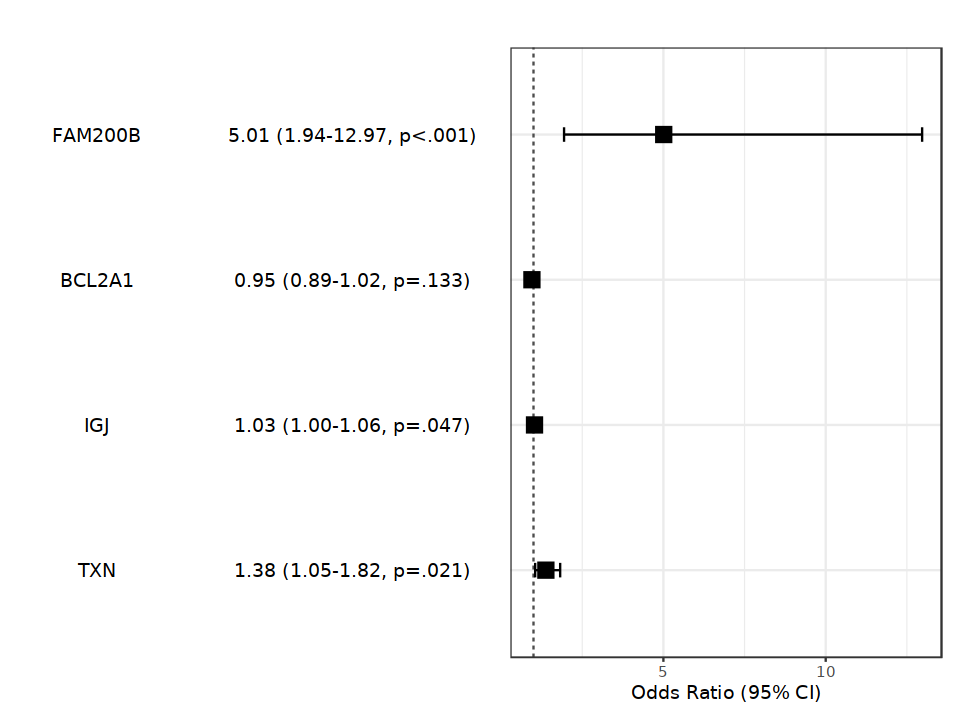

In [88]:
modelPlot(overall.log,change.pointsize = T)

In [89]:
pdf('./fig/multi.pdf',height = 6,width = 5)
modelPlot(overall.log,change.pointsize = T)
dev.off()

png 
  2

In [90]:
save(data,file = 'data.rda')

In [91]:
getwd()

[1] "/data/import/project1/momo-6.12.0.199/runtime/PIPELINE/taxonkit1/a.ji/data2"

In [92]:
library(ROCR)
dd<-datadist(data)  
options(datadist="dd")
data$Group = as.factor(data$Group)
fit1 <- lrm(Group~. , data=data,x=T,y=T)
save(fit1,data,file = 'train.fit1.rda')

Warning message:
"package 'ROCR' was built under R version 4.2.3"


In [93]:
fit1

Logistic Regression Model

lrm(formula = Group ~ ., data = data, x = T, y = T)

                       Model Likelihood    Discrimination    Rank Discrim.    
                             Ratio Test           Indexes          Indexes    
Obs            74    LR chi2      54.77    R2       0.704    C       0.942    
 0             31    d.f.             4    R2(4,74) 0.496    Dxy     0.884    
 1             43    Pr(> chi2) <0.0001    R2(4,54) 0.609    gamma   0.884    
max |deriv| 2e-08                          Brier    0.092    tau-a   0.437    

          Coef     S.E.   Wald Z Pr(>|Z|)
Intercept -13.8171 3.4340 -4.02  <0.0001 
FAM200B     1.6120 0.4850  3.32  0.0009  
BCL2A1     -0.0500 0.0333 -1.50  0.1326  
IGJ         0.0287 0.0144  1.99  0.0467  
TXN         0.3245 0.1407  2.31  0.0211  


In [94]:
load('train.fit1.rda')

In [95]:
fit1

Logistic Regression Model

lrm(formula = Group ~ ., data = data, x = T, y = T)

                       Model Likelihood    Discrimination    Rank Discrim.    
                             Ratio Test           Indexes          Indexes    
Obs            74    LR chi2      54.77    R2       0.704    C       0.942    
 0             31    d.f.             4    R2(4,74) 0.496    Dxy     0.884    
 1             43    Pr(> chi2) <0.0001    R2(4,54) 0.609    gamma   0.884    
max |deriv| 2e-08                          Brier    0.092    tau-a   0.437    

          Coef     S.E.   Wald Z Pr(>|Z|)
Intercept -13.8171 3.4340 -4.02  <0.0001 
FAM200B     1.6120 0.4850  3.32  0.0009  
BCL2A1     -0.0500 0.0333 -1.50  0.1326  
IGJ         0.0287 0.0144  1.99  0.0467  
TXN         0.3245 0.1407  2.31  0.0211  


In [96]:
require(cowplot)
require(tidyverse)
require(ggplot2)
require(ggsci)
require(ggpubr)

Loading required package: cowplot

Warning message:
"package 'cowplot' was built under R version 4.2.3"
Loading required package: tidyverse

-- Attaching packages --------------------------------------- tidyverse 1.3.2 --
v tibble  3.2.1     v purrr   1.0.2
v tidyr   1.3.1     v stringr 1.5.1
v readr   2.1.5     v forcats 1.0.0
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x epiDisplay::alpha()     masks ggplot2::alpha()
x plyr::arrange()         masks dplyr::arrange()
x randomForest::combine() masks dplyr::combine()
x purrr::compact()        masks plyr::compact()
x plyr::count()           masks dplyr::count()
x plyr::desc()            masks dplyr::desc()
x plyr::failwith()        masks dplyr::failwith()
x dplyr::filter()         masks stats::filter()
x plyr::id()              masks dplyr::id()
x dplyr::lag()        

In [97]:
head(data,2)

,Group,FAM200B,BCL2A1,IGJ,TXN
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,4.886505,22.32717,21.40125,7.655688
2,0,6.201921,32.12134,21.30293,17.794071


In [98]:
data1 = data

data1$Group = ifelse(data1$Group == 1,'CI','Con')

mydata<-data1 %>% 
  gather(key="gene",value="Expression",FAM200B:TXN) %>% 
  ##
  dplyr::select(Group,gene,Expression) 

compare_means( Expression ~ Group, data = mydata, method = 't.test',
              group.by = "gene")
p <- ggboxplot(mydata, x = "Group", y = "Expression",
          color = "Group", palette = "jco",
          add = "jitter",
          facet.by = "gene", short.panel.labs = FALSE)
p <- ggboxplot(mydata, x = "gene", y = "Expression",
          color = "Group", palette = "nejm",
          add = "jitter")
diffgene = as.data.frame(compare_means( Expression ~ Group, data = mydata, method = 't.test',
              group.by = "gene"))
diffgene = rownames(diffgene) = diffgene[,1]
options(repr.plot.height = 5,repr.plot.width = 21)
options(repr.plot.width = 7,repr.plot.height = 5)

gene,.y.,group1,group2,p,p.adj,p.format,p.signif,method
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
FAM200B,Expression,Con,CI,2.706578e-10,1.1e-09,2.7e-10,****,T-test
BCL2A1,Expression,Con,CI,7.364233e-04,1.5e-03,0.00074,***,T-test
IGJ,Expression,Con,CI,1.003534e-03,1.5e-03,0.00100,**,T-test
TXN,Expression,Con,CI,2.832693e-06,8.5e-06,2.8e-06,****,T-test


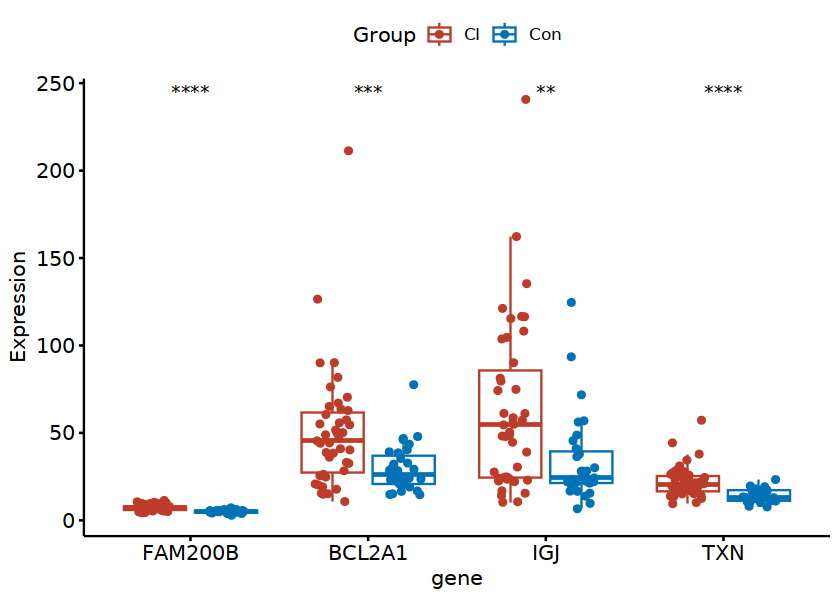

In [99]:
p + stat_compare_means(aes(group = Group), label = "p.signif",method = 't.test')

In [100]:
ggsave(file = './fig/Cohort1.figure2.gene.expr.pdf',width = 7,height = 4)

In [101]:
tend1 = data1[,c( 2:5)] 
gene_cor <- cor(tend1, method = 'pearson')
diag(gene_cor) <- 0
gene_cor <- reshape2::melt(gene_cor)
gene_cor <- subset(gene_cor, value != 0)  #
head(gene_cor)

library(circlize)
pdf('./fig/Cohort1.cor.circle.pdf',height = 6,width = 6)
p= chordDiagram(gene_cor, 
    annotationTrack = c('grid', 'name', 'axis'), 
    grid.col = c(TNFSF14 = 'green3', CCNA2 = 'red', MARCKS = 'orange', SGOL1 = 'purple', SAP130 = 'skyblue'), 
    col = colorRamp2(c(-1, 0, 1), c('green', 'white', 'red'), transparency = 0.5), 
    annotationTrackHeight = c(0.05, 0.05), 
)
dev.off()

,Var1,Var2,value
,<fct>,<fct>,<dbl>
2,BCL2A1,FAM200B,0.5929517
3,IGJ,FAM200B,0.2989180
4,TXN,FAM200B,0.6977731
5,FAM200B,BCL2A1,0.5929517
7,IGJ,BCL2A1,0.2126603
8,TXN,BCL2A1,0.8300201


circlize version 0.4.16
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




png 
  2

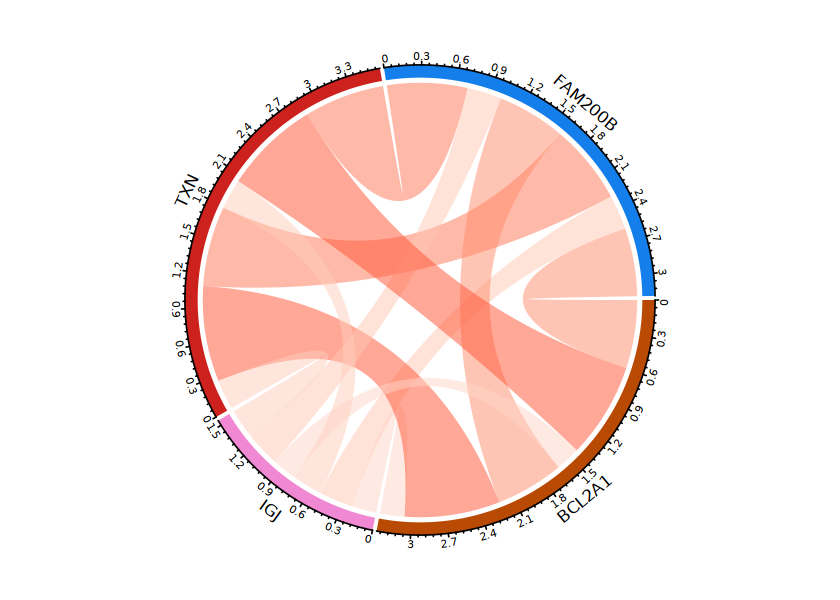

In [103]:
chordDiagram(gene_cor, 
    annotationTrack = c('grid', 'name', 'axis'), 
    grid.col = c(TNFSF14 = 'green3', CCNA2 = 'red', MARCKS = 'orange', SGOL1 = 'purple', SAP130 = 'skyblue'), 
    col = colorRamp2(c(-1, 0, 1), c('green', 'white', 'red'), transparency = 0.5), 
    annotationTrackHeight = c(0.05, 0.05), 
)

In [104]:
b

[1] "FAM200B" "BCL2A1"  "IGJ"     "TXN"

In [105]:
da2 = expr[,b] %>% tibble::rownames_to_column(.,'sample')